In [1]:
%run ../../shared_setup.ipynb

docker image cggh/biipy:v1.6.0


In [2]:
def tabulate(f):
    class Tabulated(etl.Table):
        def __init__(self, *args, **kwargs):
            self.args = args
            self.kwargs = kwargs
        def __iter__(self):
            return f(*self.args, **self.kwargs)
    return Tabulated
        

In [3]:
@tabulate
def tabulate_core_windows(window_size):
    yield 'chrom', 'start', 'stop'
    for rec in tbl_regions_1b.eq('region_type', 'Core').records():
        for start in range(rec.region_start, rec.region_stop, window_size):
            yield rec.region_chrom, start, start + window_size - 1
    

In [4]:
tbl_co = (
    etl
    .frompickle(os.path.join(PUBLIC_DIR, 'tbl_co.pickle'))
    .convert('chrom', lambda v: str(v, 'ascii'))
)
display_with_nrows(tbl_co, caption='CO events')

0|sample,1|chrom,2|co_pos_mid,3|co_pos_min,4|co_pos_max,5|co_pos_range,6|cross,7|co_from_parent,8|co_to_parent
B1SD/PG0015-C/ERR019044,Pf3D7_01_v3,145052,144877,145227,350,hb3_dd2,hb3,dd2
GC03/PG0021-C/ERR015447,Pf3D7_01_v3,163584,163145,164024,879,hb3_dd2,dd2,hb3
XF12/PG0102-C/ERR029143,Pf3D7_01_v3,206769,205803,207736,1933,7g8_gb4,gb4,7g8
7C159/PG0040-Cx/ERR107475,Pf3D7_01_v3,206905,206074,207736,1662,hb3_dd2,hb3,dd2
CH3_61/PG0033-Cx/ERR175544,Pf3D7_01_v3,206905,206074,207736,1662,hb3_dd2,dd2,hb3


In [5]:
is_exon = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_exon[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_exons.eq('feature_chrom', chrom).records():
        start = rec.feature_start - 1
        stop = rec.feature_stop
        is_exon[chrom][start:stop] = True


2016-03-14 15:24:26.350678 :: Pf3D7_01_v3
2016-03-14 15:24:26.389463 :: Pf3D7_02_v3
2016-03-14 15:24:26.424155 :: Pf3D7_03_v3
2016-03-14 15:24:26.460277 :: Pf3D7_04_v3
2016-03-14 15:24:26.493263 :: Pf3D7_05_v3
2016-03-14 15:24:26.526733 :: Pf3D7_06_v3
2016-03-14 15:24:26.561042 :: Pf3D7_07_v3
2016-03-14 15:24:26.597658 :: Pf3D7_08_v3
2016-03-14 15:24:26.633981 :: Pf3D7_09_v3
2016-03-14 15:24:26.670715 :: Pf3D7_10_v3
2016-03-14 15:24:26.705302 :: Pf3D7_11_v3
2016-03-14 15:24:26.740746 :: Pf3D7_12_v3
2016-03-14 15:24:26.776300 :: Pf3D7_13_v3
2016-03-14 15:24:26.814106 :: Pf3D7_14_v3


In [8]:
%%R
library(AER)

/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: car

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lmtest

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: zoo

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: 'zoo'


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjec

In [39]:
callsets = load_callsets(COMBINED_CALLSET_FN_TEMPLATE, 
                         variant_filter='FILTER_PASS',
                         call_filter=combined_conf_calls, 
                         sample_exclusions=excessive_recomb_samples)

2016-03-14 16:33:06.102736 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/3d7_hb3.combined.final.npz
2016-03-14 16:33:06.312482 :: filter variants: excluding 157 (0.4%) retaining 42087 (99.6%) of 42244 variants
2016-03-14 16:33:06.355337 :: filter calls: excluding 2439 (0.3%) retaining 881388 (99.7%) of 883827 calls
2016-03-14 16:33:06.356063 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/hb3_dd2.combined.final.npz
2016-03-14 16:33:06.616439 :: filter variants: excluding 450 (1.2%) retaining 36461 (98.8%) of 36911 variants
2016-03-14 16:33:06.631426 :: filter samples: excluding ['SC01/PG0025-C/ERR019045'] including ['HB3/PG0004-CW/ERR012788', 'DD2/PG0008-CW/ERR012840', '1BB5/PG0023-C/ERR015449', '3BA6/PG0022-Cx/ERR126027', '3BD5/PG0024-C/ERR019053', '7C101/PG0074-C/ERR019048', '7C111/PG0038-C/ERR015457', '7C12/PG0035-Cx/ERR037704', '7C126/PG0047-C/ERR015452', '7C140/PG0039-C/ERR015454', '7C159/PG0040-Cx/ERR107475', '7C16/PG0036-C/ERR015

In [40]:
pos = dict()
for cross in CROSSES:
    variants = callsets[cross]['variants']
    pos[cross] = allel.SortedMultiIndex(variants['CHROM'], variants['POS'])

In [42]:
is_snp = dict()
for cross in CROSSES:
    variants = callsets[cross]['variants']
    is_snp[cross] = variants['is_snp']

In [48]:
loc = pos['3d7_hb3'].locate_range(b'Pf3D7_01_v3', 92901, 93900)
loc

KeyError: (b'Pf3D7_01_v3', 92901, 93900)

In [45]:
is_snp['3d7_hb3'][loc]

array([False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False], dtype=bool)

In [51]:
def distance_to_centromere(row):
    cen_id = 'PF3D7_CEN' + row.chrom[6:8]
    try:
        cen = lkp_feature[cen_id]
        cen_pos = (cen['feature_start'] + cen['feature_stop'])/2
        window_pos = (row.start + row.stop) / 2
        return abs(window_pos - cen_pos)
    except KeyError:
        return None
    

def n_coding(row):
    return np.count_nonzero(is_exon[row.chrom][row.start-1:row.stop])


def gc(row):
    seq = fasta[row.chrom][row.start-1:row.stop].lower()
    com = collections.Counter(seq)
    return (com['g'] + com['c']) / len(seq) 


def n_variants(row):
    nv = ni = ns = 0
    start = row.start
    stop = row.stop
    chrom = row.chrom.encode('ascii')
    for cross in CROSSES:
        try:
            loc = pos[cross].locate_range(chrom, start, stop)
        except KeyError:
            pass
        else:
            x = is_snp[cross][loc]
            ns += nnz(x)
            ni += nnz(~x)
    return ns, ni
    
    
def analyse_dispersion(*window_sizes):
    for window_size in window_sizes:
        log('=================================')
        log(window_size)
        
        # tabulate windows
        tbl_windows = tabulate_core_windows(window_size)
        
        # count COs in windows
        tbl_windows_co = (
            tbl_windows
            .intervalleftjoin(tbl_co, lkey='chrom', lstart='start', lstop='stop',
                              rkey='chrom', rstart='co_pos_min', rstop='co_pos_max',
                              include_stop=True)
            .cutout(4)
            .aggregate(key=('chrom', 'start', 'stop'),
                       aggregation=lambda vals: sum(1 for v in vals if v is not None),
                       value='cross')
            .rename('value', 'co_count')
            
        )
        tbl_windows_co.valuecounts('co_count').displayall(caption='window size: %sbp' % window_size)
        
        # augment
        tbl_aug = (
            tbl_windows_co
            .addfield('cen_dist', distance_to_centromere)
            .notnone('cen_dist')
            .addfield('n_coding', n_coding)
            .addfield('gc', gc)
            .addfield('n_variants', n_variants)
            .unpack('n_variants', ('n_snps', 'n_indels'))
        )
        tbl_aug.display(caption='augmented windows')
        
        # convert to dataframe
        df = tbl_aug.todataframe()
        df_cen = df[df.cen_dist < 100000]
        df_tel = df[df.cen_dist > 100000]
        
        # model 
        log('************************')
        log('model centromeric')
        mu_cen = df_cen.co_count.mean()
        log(mu_cen)
        log('~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        rd = %R -i df_cen -o rd rd <- glm(co_count ~ cen_dist + n_coding + gc + n_snps + n_indels, data = df_cen, family = poisson)
        summ = %R summary(rd)
        log(summ)
        t = %R -i rd -o t t <- dispersiontest(rd, trafo=1, alternative="greater")
        log(t)
        
        log('************************')
        log('model telomeric')
        mu_tel = df_tel.co_count.mean()
        log(mu_tel)
        log('~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        rd = %R -i df_tel -o rd rd <- glm(co_count ~ cen_dist + n_coding + gc + n_snps + n_indels, data = df_tel, family = poisson)
        summ = %R summary(rd)
        log(summ)
        t = %R -i rd -o t t <- dispersiontest(rd, trafo=1, alternative="greater")
        log(t)


In [54]:
analyse_dispersion(1000)

2016-03-14 17:00:52.889118 :: =================================
2016-03-14 17:00:52.889442 :: 1000


0|co_count,1|count,2|frequency
0,17573,0.844774540909528
1,2584,0.1242188251129699
2,438,0.021055667724257283
3,192,0.009229881742140178
4,12,0.0005768676088837611
5,3,0.00014421690222094028


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels
Pf3D7_01_v3,92901,93900,0,365720.5,0,0.212,1,0
Pf3D7_01_v3,93901,94900,0,364720.5,0,0.124,3,6
Pf3D7_01_v3,94901,95900,0,363720.5,0,0.284,25,3
Pf3D7_01_v3,95901,96900,0,362720.5,0,0.108,0,2
Pf3D7_01_v3,96901,97900,0,361720.5,0,0.094,0,2


2016-03-14 17:01:08.295303 :: ************************
2016-03-14 17:01:08.295656 :: model centromeric
2016-03-14 17:01:08.296016 :: 0.162679425837
2016-03-14 17:01:08.296180 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 17:01:08.342602 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0001  -0.6205  -0.5025  -0.3882   3.3288  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.256e+00  3.010e-01  -7.494 6.68e-14 ***
cen_dist     1.456e-05  1.842e-06   7.906 2.66e-15 ***
n_coding     1.085e-03  2.214e-04   4.899 9.64e-07 ***
gc          -5.677e+00  1.819e+00  -3.120  0.00181 ** 
n_snps      -2.654e-02  1.804e-02  -1.471  0.14119    
n_indels     2.440e-02  2.033e-02   1.200  0.23019    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null

In [55]:
analyse_dispersion(2000)

2016-03-14 17:01:08.739122 :: =================================
2016-03-14 17:01:08.739385 :: 2000


0|co_count,1|count,2|frequency
0,8351,0.8022864828513786
1,1618,0.15544240561052936
2,311,0.02987799020078778
3,117,0.011240272840810837
4,10,0.0009607070804111826
5,2,0.00019214141608223654


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels
Pf3D7_01_v3,92901,94900,0,365220.5,0,0.168,4,6
Pf3D7_01_v3,94901,96900,0,363220.5,0,0.196,25,5
Pf3D7_01_v3,96901,98900,0,361220.5,82,0.0995,2,4
Pf3D7_01_v3,98901,100900,0,359220.5,1794,0.301,4,1
Pf3D7_01_v3,100901,102900,0,357220.5,1382,0.2305,2,2


2016-03-14 17:01:17.223391 :: ************************
2016-03-14 17:01:17.223750 :: model centromeric
2016-03-14 17:01:17.224152 :: 0.224620303757
2016-03-14 17:01:17.224364 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 17:01:17.253926 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1606  -0.7155  -0.5663  -0.4167   3.4972  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.685e+00  4.452e-01  -3.785 0.000153 ***
cen_dist     1.472e-05  2.251e-06   6.539 6.18e-11 ***
n_coding     6.953e-04  1.592e-04   4.367 1.26e-05 ***
gc          -8.323e+00  2.745e+00  -3.032 0.002429 ** 
n_snps      -9.854e-03  1.069e-02  -0.922 0.356664    
n_indels     1.964e-02  1.648e-02   1.192 0.233387    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null

In [56]:
analyse_dispersion(5000)

2016-03-14 17:01:17.395295 :: =================================
2016-03-14 17:01:17.395554 :: 5000


0|co_count,1|count,2|frequency
0,2869,0.687185628742515
1,935,0.22395209580838324
2,279,0.06682634730538922
3,77,0.01844311377245509
4,13,0.0031137724550898203
5,2,0.00047904191616766467


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels
Pf3D7_01_v3,92901,97900,0,363720.5,0,0.1644,29,13
Pf3D7_01_v3,97901,102900,0,358720.5,3258,0.2336,8,5
Pf3D7_01_v3,102901,107900,0,353720.5,354,0.1518,8,20
Pf3D7_01_v3,107901,112900,0,348720.5,1805,0.2098,7,18
Pf3D7_01_v3,112901,117900,0,343720.5,2899,0.2128,7,14


2016-03-14 17:01:21.887883 :: ************************
2016-03-14 17:01:21.888212 :: model centromeric
2016-03-14 17:01:21.888625 :: 0.417647058824
2016-03-14 17:01:21.888825 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 17:01:21.904825 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4701  -0.9258  -0.6829   0.4609   2.7685  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.156e+00  6.786e-01  -1.703  0.08851 .  
cen_dist     1.502e-05  2.646e-06   5.675 1.38e-08 ***
n_coding     3.007e-04  9.595e-05   3.134  0.00172 ** 
gc          -8.883e+00  4.435e+00  -2.003  0.04518 *  
n_snps      -9.479e-03  7.912e-03  -1.198  0.23089    
n_indels     1.726e-02  9.944e-03   1.736  0.08261 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null

In [57]:
analyse_dispersion(10000)

2016-03-14 17:01:21.986951 :: =================================
2016-03-14 17:01:21.987190 :: 10000


0|co_count,1|count,2|frequency
0,1122,0.5350500715307582
1,599,0.28564616118264186
2,260,0.12398664759179781
3,90,0.04291845493562232
4,24,0.011444921316165951
5,1,0.0004768717215069146
6,1,0.0004768717215069146


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels
Pf3D7_01_v3,92901,102900,0,361220.5,3258,0.199,37,18
Pf3D7_01_v3,102901,112900,0,351220.5,2159,0.1808,15,38
Pf3D7_01_v3,112901,122900,0,341220.5,4792,0.1984,12,27
Pf3D7_01_v3,122901,132900,0,331220.5,5004,0.1735,17,39
Pf3D7_01_v3,132901,142900,0,321220.5,6522,0.192,22,41


2016-03-14 17:01:24.909119 :: ************************
2016-03-14 17:01:24.909440 :: model centromeric
2016-03-14 17:01:24.909819 :: 0.730769230769
2016-03-14 17:01:24.910060 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 17:01:24.923039 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9605  -1.1007  -0.7299   0.5574   2.4562  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.763e-01  9.417e-01  -0.187   0.8515    
cen_dist     1.411e-05  2.889e-06   4.884 1.04e-06 ***
n_coding     1.528e-04  6.462e-05   2.365   0.0180 *  
gc          -1.178e+01  6.241e+00  -1.887   0.0592 .  
n_snps      -2.979e-03  2.603e-03  -1.145   0.2524    
n_indels     1.267e-02  6.993e-03   1.811   0.0701 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null

In [58]:
analyse_dispersion(20000)

2016-03-14 17:01:24.980767 :: =================================
2016-03-14 17:01:24.981021 :: 20000


0|co_count,1|count,2|frequency
0,376,0.35471698113207545
1,301,0.2839622641509434
2,221,0.20849056603773586
3,102,0.09622641509433963
4,39,0.03679245283018868
5,13,0.012264150943396227
6,6,0.005660377358490566
7,2,0.0018867924528301887


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels
Pf3D7_01_v3,92901,112900,0,356220.5,5417,0.1899,52,56
Pf3D7_01_v3,112901,132900,0,336220.5,9796,0.18595,29,66
Pf3D7_01_v3,132901,152900,1,316220.5,14142,0.20315,45,56
Pf3D7_01_v3,152901,172900,1,296220.5,12865,0.1888,62,91
Pf3D7_01_v3,172901,192900,0,276220.5,8592,0.17105,128,116


2016-03-14 17:01:27.212571 :: ************************
2016-03-14 17:01:27.212860 :: model centromeric
2016-03-14 17:01:27.213241 :: 1.31617647059
2016-03-14 17:01:27.213479 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 17:01:27.222630 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2414  -1.1432  -0.2514   0.6606   3.0119  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.733e-02  1.326e+00  -0.051    0.959    
cen_dist     1.336e-05  3.231e-06   4.135 3.55e-05 ***
n_coding     6.881e-05  4.266e-05   1.613    0.107    
gc          -8.980e+00  8.575e+00  -1.047    0.295    
n_snps      -1.843e-04  5.766e-04  -0.320    0.749    
n_indels     6.979e-03  4.538e-03   1.538    0.124    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null 

In [59]:
analyse_dispersion(50000)

2016-03-14 17:01:27.268529 :: =================================
2016-03-14 17:01:27.268956 :: 50000


0|co_count,1|count,2|frequency
2,88,0.2018348623853211
3,73,0.16743119266055045
1,66,0.15137614678899083
4,66,0.15137614678899083
0,52,0.11926605504587157
5,51,0.11697247706422019
6,18,0.04128440366972477
8,10,0.022935779816513763
7,9,0.020642201834862386
9,2,0.0045871559633027525


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels
Pf3D7_01_v3,92901,142900,0,341220.5,21735,0.18874,103,163
Pf3D7_01_v3,142901,192900,2,291220.5,29077,0.1868,213,222
Pf3D7_01_v3,192901,242900,4,241220.5,30768,0.197,70,123
Pf3D7_01_v3,242901,292900,1,191220.5,29821,0.19262,68,157
Pf3D7_01_v3,292901,342900,6,141220.5,28248,0.18416,64,201


2016-03-14 17:01:29.200561 :: ************************
2016-03-14 17:01:29.200841 :: model centromeric
2016-03-14 17:01:29.201139 :: 2.98305084746
2016-03-14 17:01:29.201300 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 17:01:29.208955 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1146  -0.9826  -0.1383   0.6388   2.3396  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.458e+00  1.868e+00  -0.781  0.43492    
cen_dist     2.394e-06  4.023e-06   0.595  0.55185    
n_coding     6.127e-05  2.360e-05   2.596  0.00943 ** 
gc          -5.797e+00  1.094e+01  -0.530  0.59616    
n_snps      -3.986e-04  3.395e-04  -1.174  0.24035    
n_indels     1.019e-02  2.710e-03   3.759  0.00017 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null 

In [60]:
analyse_dispersion(100000)

2016-03-14 17:01:29.245275 :: =================================
2016-03-14 17:01:29.245515 :: 100000


0|co_count,1|count,2|frequency
4,38,0.16593886462882096
6,30,0.13100436681222707
5,28,0.1222707423580786
7,25,0.1091703056768559
8,20,0.08733624454148471
3,19,0.08296943231441048
0,13,0.056768558951965066
2,13,0.056768558951965066
9,12,0.05240174672489083
10,11,0.048034934497816595


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels
Pf3D7_01_v3,92901,192900,2,316220.5,50812,0.18777,316,385
Pf3D7_01_v3,192901,292900,5,216220.5,60589,0.19481,138,280
Pf3D7_01_v3,292901,392900,8,116220.5,52005,0.1847,128,421
Pf3D7_01_v3,392901,492900,6,16220.5,49583,0.18866,134,363
Pf3D7_01_v3,460312,560311,3,51190.5,42915,0.20299,1403,486


2016-03-14 17:01:31.054901 :: ************************
2016-03-14 17:01:31.055207 :: model centromeric
2016-03-14 17:01:31.055475 :: 6.2
2016-03-14 17:01:31.055629 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 17:01:31.062878 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7081  -0.8017  -0.2442   0.8081   1.8723  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)  8.848e-01  2.100e+00   0.421   0.6735  
cen_dist     2.832e-06  4.612e-06   0.614   0.5392  
n_coding     1.684e-05  1.928e-05   0.873   0.3824  
gc          -9.940e+00  1.267e+01  -0.784   0.4329  
n_snps      -2.184e-04  2.605e-04  -0.838   0.4018  
n_indels     4.973e-03  1.938e-03   2.566   0.0103 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 53.378  on 34 

## Sandbox

In [47]:
tbl_5kb = tabulate_core_windows()
tbl_5kb

0|chrom,1|start,2|stop
Pf3D7_01_v3,92901,97900
Pf3D7_01_v3,97901,102900
Pf3D7_01_v3,102901,107900
Pf3D7_01_v3,107901,112900
Pf3D7_01_v3,112901,117900


In [48]:
tbl_5kb_co = (
    tbl_5kb
    .intervalleftjoin(tbl_co, lkey='chrom', lstart='start', lstop='stop',
                      rkey='chrom', rstart='co_pos_min', rstop='co_pos_max',
                      include_stop=True)
    .cutout(4)
    .aggregate(key=('chrom', 'start', 'stop'),
               aggregation=lambda vals: sum(1 for v in vals if v is not None),
               value='cross')
    .rename('value', 'co_count')
)
tbl_5kb_co.gt('co_count', 0)

0|chrom,1|start,2|stop,3|co_count
Pf3D7_01_v3,142901,147900,1
Pf3D7_01_v3,162901,167900,1
Pf3D7_01_v3,202901,207900,3
Pf3D7_01_v3,227901,232900,1
Pf3D7_01_v3,232901,237900,1


In [82]:
is_exon = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_exon[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_exons.eq('feature_chrom', chrom).records():
        start = rec.feature_start - 1
        stop = rec.feature_stop
        is_exon[chrom][start:stop] = True


2016-03-14 14:11:55.420788 :: Pf3D7_01_v3
2016-03-14 14:11:55.794967 :: Pf3D7_02_v3
2016-03-14 14:11:55.830365 :: Pf3D7_03_v3
2016-03-14 14:11:55.867528 :: Pf3D7_04_v3
2016-03-14 14:11:55.903987 :: Pf3D7_05_v3
2016-03-14 14:11:55.940566 :: Pf3D7_06_v3
2016-03-14 14:11:55.974674 :: Pf3D7_07_v3
2016-03-14 14:11:56.006387 :: Pf3D7_08_v3
2016-03-14 14:11:56.038419 :: Pf3D7_09_v3
2016-03-14 14:11:56.071895 :: Pf3D7_10_v3
2016-03-14 14:11:56.105776 :: Pf3D7_11_v3
2016-03-14 14:11:56.140899 :: Pf3D7_12_v3
2016-03-14 14:11:56.176380 :: Pf3D7_13_v3
2016-03-14 14:11:56.214013 :: Pf3D7_14_v3


In [117]:
def distance_to_centromere(row):
    cen_id = 'PF3D7_CEN' + row.chrom[6:8]
    try:
        cen = lkp_feature[cen_id]
        cen_pos = (cen['feature_start'] + cen['feature_stop'])/2
        window_pos = (row.start + row.stop) / 2
        return abs(window_pos - cen_pos)
    except KeyError:
        return None
    

def n_coding(row):
    return np.count_nonzero(is_exon[row.chrom][row.start-1:row.stop])


def gc(row):
    seq = fasta[row.chrom][row.start-1:row.stop].lower()
    com = collections.Counter(seq)
    return (com['g'] + com['c']) / len(seq) 


tbl_5kb_co_aug = (
    tbl_5kb_co
    .addfield('cen_dist', distance_to_centromere)
    .notnone('cen_dist')
    .addfield('n_coding', n_coding)
    .addfield('gc', gc)
)
tbl_5kb_co_aug

0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc
Pf3D7_01_v3,92901,97900,0,363720.5,0,0.1644
Pf3D7_01_v3,97901,102900,0,358720.5,3258,0.2336
Pf3D7_01_v3,102901,107900,0,353720.5,354,0.1518
Pf3D7_01_v3,107901,112900,0,348720.5,1805,0.2098
Pf3D7_01_v3,112901,117900,0,343720.5,2899,0.2128


In [118]:
df = tbl_5kb_co_aug.todataframe()
df.head()

,chrom,start,stop,co_count,cen_dist,n_coding,gc
0,Pf3D7_01_v3,92901,97900,0,363720.5,0,0.1644
1,Pf3D7_01_v3,97901,102900,0,358720.5,3258,0.2336
2,Pf3D7_01_v3,102901,107900,0,353720.5,354,0.1518
3,Pf3D7_01_v3,107901,112900,0,348720.5,1805,0.2098
4,Pf3D7_01_v3,112901,117900,0,343720.5,2899,0.2128


In [119]:
df_cen = df[df.cen_dist < 100000]
df_tel = df[df.cen_dist > 100000]

In [120]:
%%R -i df_cen
rd <- glm(co_count ~ cen_dist + n_coding + gc, data = df_cen, family = poisson)
summary(rd)


Call:
glm(formula = co_count ~ cen_dist + n_coding + gc, family = poisson, 
    data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5206  -0.9219  -0.6825   0.4439   2.9431  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.218e-01  6.183e-01  -1.167  0.24307    
cen_dist     1.614e-05  2.534e-06   6.370 1.89e-10 ***
n_coding     2.335e-04  8.232e-05   2.836  0.00457 ** 
gc          -9.288e+00  4.202e+00  -2.211  0.02706 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 546.68  on 509  degrees of freedom
Residual deviance: 496.79  on 506  degrees of freedom
AIC: 846.54

Number of Fisher Scoring iterations: 6



In [121]:
%%R
dispersiontest(rd, trafo=1, alternative="greater")


	Overdispersion test

data:  rd
z = 2.3429, p-value = 0.009567
alternative hypothesis: true alpha is greater than 0
sample estimates:
    alpha 
0.1488943 



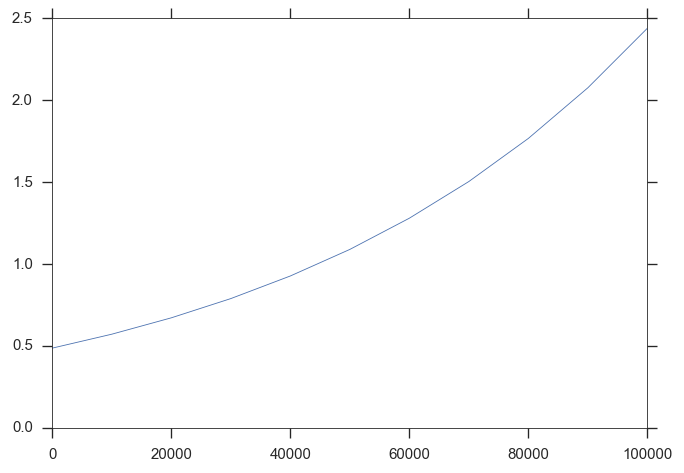

In [122]:
cen_dist = np.arange(0, 110000, 10000)
y = np.e**(-7.218e-01 + 1.614e-05*cen_dist)
plt.plot(cen_dist, y)
plt.autoscale(axis='y');

In [123]:
%%R -i df_tel
rd <- glm(co_count ~ cen_dist + n_coding + gc, data = df_tel, family = poisson)
summary(rd)


Call:
glm(formula = co_count ~ cen_dist + n_coding + gc, family = poisson, 
    data = df_tel)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3010  -0.9444  -0.8522   0.6453   4.1154  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.845e-01  2.400e-01  -1.186  0.23581    
cen_dist    -3.454e-07  6.909e-08  -4.999 5.77e-07 ***
n_coding     2.014e-04  2.962e-05   6.799 1.05e-11 ***
gc          -5.031e+00  1.522e+00  -3.305  0.00095 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3639.6  on 3363  degrees of freedom
Residual deviance: 3562.3  on 3360  degrees of freedom
AIC: 5896.7

Number of Fisher Scoring iterations: 6



In [124]:
%%R
dispersiontest(rd, trafo=1, alternative="greater")


	Overdispersion test

data:  rd
z = 6.6494, p-value = 1.471e-11
alternative hypothesis: true alpha is greater than 0
sample estimates:
    alpha 
0.2277584 



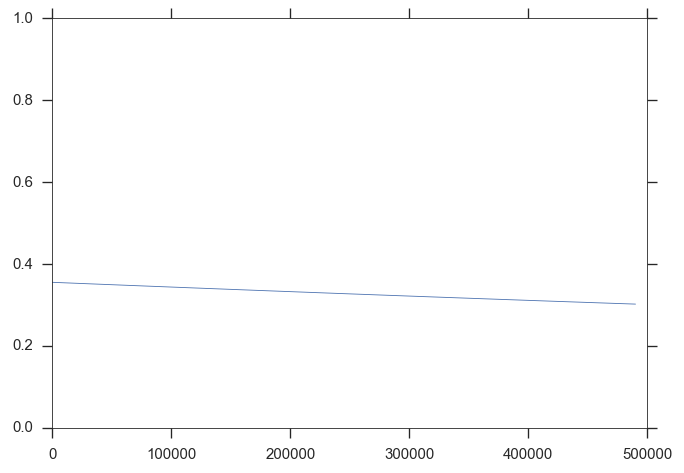

In [116]:
cen_dist = np.arange(0, 500000, 10000)
y = np.e**(-1.035e+00 + -3.316e-07*cen_dist)
plt.plot(x, y)
plt.ylim(0, 1);

## Sandbox

In [19]:
tbl_5kb_co.valuecounts('co_count').displayall()

0|co_count,1|count,2|frequency
0,2869,0.687185628742515
1,935,0.22395209580838324
2,279,0.06682634730538922
3,77,0.01844311377245509
4,13,0.0031137724550898203
5,2,0.00047904191616766467


In [20]:
co_count = tbl_5kb_co.values('co_count').array()
co_count

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
%%R -i co_count
library(AER)
co_count

   [1] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 1 1 0 0 0 0 0 0 0 0
  [38] 0 1 0 0 0 0 0 2 2 3 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 3 1 1 0 0 1 1 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 [112] 0 1 2 0 0 0 0 2 1 0 1 0 0 1 1 0 0 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 2
 [149] 2 0 0 2 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 2 0 1 0 0 1 1 0 0 0 0 0 1
 [186] 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 2 1 1 2 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0
 [223] 0 0 1 1 2 1 0 0 0 0 1 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 [260] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 1 0 0 0 1 0 0 0 0 1
 [297] 2 1 2 1 0 2 3 0 2 2 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 2 0 0 0 1 1
 [334] 0 0 1 2 2 1 1 0 1 1 0 1 1 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 0 0 0
 [371] 0 0 0 1 0 0 1 0 0 0 0 1 2 1 0 0 0 0 0 2 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 [408] 1 1 0 0 2 0 0 0 0 3 3 2 1 0 1 1 1 0 2 0 0 1 1 0 1 0 1 0 0 0 0 0 0 2 0 0 0
 [445] 0 0 0 1 0 1 0 1 0 0 0

In [24]:
%%R
rd <- glm(co_count ~ 1, family = poisson)
summary(rd)


Call:
glm(formula = co_count ~ 1, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9250  -0.9250  -0.9250   0.7442   3.9295  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.84914    0.02366  -35.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 4490.6  on 4174  degrees of freedom
Residual deviance: 4490.6  on 4174  degrees of freedom
AIC: 7371.6

Number of Fisher Scoring iterations: 6



In [41]:
np.e**-.85

0.4274149319487267

In [25]:
%%R
dispersiontest(rd, trafo=1, alternative="greater")


	Overdispersion test

data:  rd
z = 8.1926, p-value < 2.2e-16
alternative hypothesis: true alpha is greater than 0
sample estimates:
    alpha 
0.2530666 



In [36]:
x = scipy.stats.poisson.rvs(np.mean(co_count), size=co_count.size)
x

array([0, 0, 1, ..., 0, 1, 1])

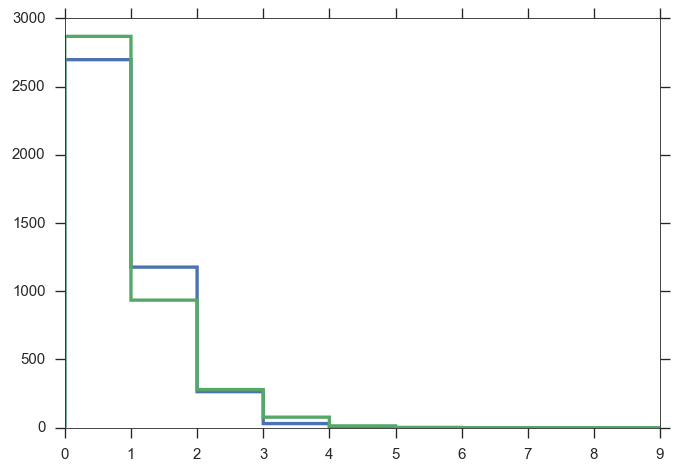

In [37]:
plt.hist(x, histtype='step', bins=np.arange(10), lw=2)
plt.hist(co_count, histtype='step', bins=np.arange(10), lw=2);

In [33]:
np.mean(co_count), np.std(co_count)

(0.42778443113772457, 0.73214916283762699)

In [35]:
np.mean(x), np.std(x)

(0.86347305389221551, 0.92110057064902273)

## Sandbox

In [14]:
%%R
library(AER)
data(RecreationDemand)
head(RecreationDemand)

  trips quality ski income userfee  costC   costS   costH
1     0       0 yes      4      no  67.59  68.620  76.800
2     0       0  no      9      no  68.86  70.936  84.780
3     0       0 yes      5      no  58.12  59.465  72.110
4     0       0  no      2      no  15.79  13.750  23.680
5     0       0 yes      3      no  24.02  34.033  34.547
6     0       0 yes      5      no 129.46 137.377 137.850


In [15]:
%%R
rd <- glm(RecreationDemand$trips ~ 1, family = poisson)
summary(rd)


Call:
glm(formula = RecreationDemand$trips ~ 1, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1186  -2.1186  -2.1186  -0.1662  21.7766  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.8084     0.0260   31.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 4849.7  on 658  degrees of freedom
Residual deviance: 4849.7  on 658  degrees of freedom
AIC: 5604.8

Number of Fisher Scoring iterations: 6



In [17]:
%%R
dispersiontest(rd, trafo=1, alternative="greater")


	Overdispersion test

data:  rd
z = 3.0234, p-value = 0.00125
alternative hypothesis: true alpha is greater than 0
sample estimates:
   alpha 
16.61573 



In [ ]:
combined = load_callsets(COMBINED_CALLSET_FN_TEMPLATE, 
                         variant_filter='FILTER_PASS',
                         call_filter=combined_conf_calls, 
                         sample_exclusions=excessive_recomb_samples)

In [ ]:
variants = combined['3d7_hb3']['variants']

In [ ]:
pos = variants['POS'][variants['CHROM'] == b'Pf3D7_01_v3']
pos.shape

In [ ]:
tbl_intervals = (
    etl
    .fromcolumns((pos[:-1], pos[1:], np.diff(pos)), header=('start', 'stop', 'length'))
    .addfield('chrom', b'Pf3D7_01_v3', index=0)
    .intervalleftjoin(tbl_recom.prefixheader('recom_'), 
                      lkey='chrom', lstart='start', lstop='stop',
                      rkey='recom_chrom', rstart='recom_start', rstop='recom_stop',
                      include_stop=True)
    .aggregate(key=('chrom', 'start', 'stop', 'length'),
               aggregation=list, value='recom_type')
    .rename('value', 'event_types')
    .convert('event_types', lambda v: [] if v == [None] else v)
    .addfield('n_events', lambda row: len(row.event_types))
)
tbl_intervals.gt('n_events', 0).display(50)